# Learning curve

- $y = x_0 * x^{\alpha}$

  - $y$ is the performance
  - $x_0$ is the initial performance
  - $\alpha$ is the learning rate ($\alpha < 1$)

- Sources:
  - <https://doi.org/10.1177/0018720808329844>
  - <https://canmedia.mheducation.ca/college/olcsupport/stevenson/5ce/ste39590_ch07S_001-021.pdf>
  - <https://core.ecu.edu/krosj/LCrv2.pdf>


## Set up


In [1]:
# Set up to use local modules
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from src import process
from src import plot

# Load the CSV file results.csv into a dataframe and add some processed columns
df = process.load_processed_results()

display(df.tail())

,id,is_pb,wpm,acc,raw_wpm,consistency,char_stats,mode,mode2,quote_length,...,iti_all,iti_session,time_since_last_new_sesh,combined_id,trial_type_id,z_wpm,z_acc,trial_num,trial_type_num,log_norm_wpm
1823,65940c8ea65b7d25a1993863,0,33.2,96.80,33.2,60.01,"332,0,0,0",time,120,-1,...,18.0,18.0,138000,29,2,1.445331,1.029419,1824,358,7.839566
1824,65940d16a65b7d25a1993e31,0,31.0,91.20,31.0,61.47,"310,0,0,0",time,120,-1,...,16.0,16.0,274000,29,2,0.914677,-0.514066,1825,359,6.796597
1825,65955ea2a65b7d25a1a4b674,0,33.5,95.99,33.5,63.41,"335,0,0,0",time,120,-1,...,86292.0,NaN,0,29,2,1.517693,0.806165,1826,360,7.981789
1826,65955f2ea65b7d25a1a4bc77,0,33.4,95.20,33.4,62.92,"334,0,0,0",time,120,-1,...,20.0,20.0,140000,29,2,1.493572,0.588423,1827,361,7.934381
1827,65955faba65b7d25a1a4c20f,0,29.7,90.91,29.7,58.77,"297,0,0,0",time,120,-1,...,5.0,5.0,0,29,2,0.601110,-0.593997,1828,362,6.180298


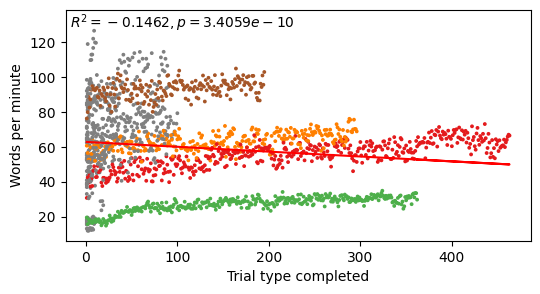

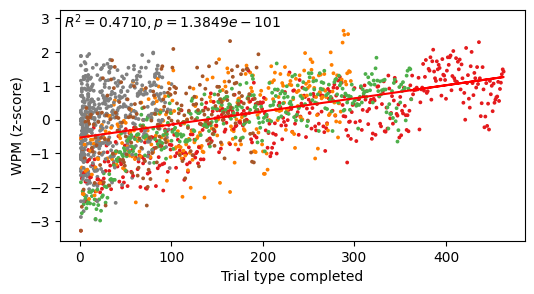

In [3]:
# WPM of all trials across all time
fig = plt.figure(figsize=(6, 3))
ax = plot.df_scatter(df, "trial_type_num", "wpm", plot_regression=True, s=3, n_colors=5)
plt.show()

# Z-WPM of all trials across all time
fig = plt.figure(figsize=(6, 3))
ax = plot.df_scatter(
    df, "trial_type_num", "z_wpm", plot_regression=True, s=3, n_colors=5
)
plt.show()

## Log curve performance over time

Example to fit log curve: <https://rowannicholls.github.io/python/mathematics/curve_fitting/logarithmic.html>


Fit parameters: x_0=38.7109, alpha=0.5298


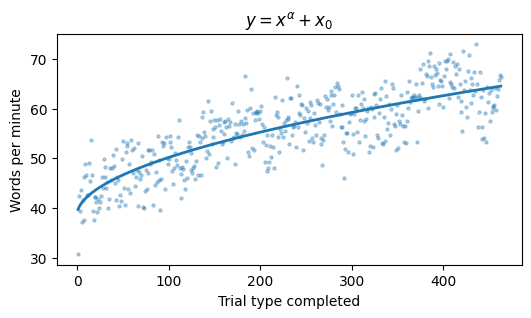

In [4]:
# Log fit for example trial type
fig = plt.figure(figsize=(6, 3))
ax = plot.log_fit_scatter(df, "wpm", n_trial_types=1)
plt.show()

Fit parameters: x_0=38.7109, alpha=0.5298
Fit parameters: x_0=16.6635, alpha=0.4642
Fit parameters: x_0=54.5828, alpha=0.4440
Fit parameters: x_0=86.3571, alpha=0.4243


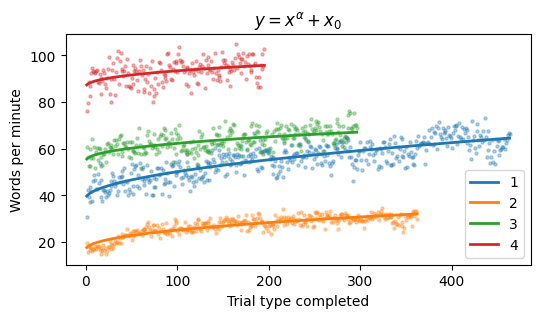

In [5]:
# Log fit for multiple trial types
fig = plt.figure(figsize=(6, 3))
ax = plot.log_fit_scatter(df, "wpm")
plt.show()

Fit parameters: x_0=-3.9296, alpha=0.2605


Fit parameters: x_0=-3.9712, alpha=0.2751
Fit parameters: x_0=-3.0124, alpha=0.2298
Fit parameters: x_0=-2.4287, alpha=0.2029


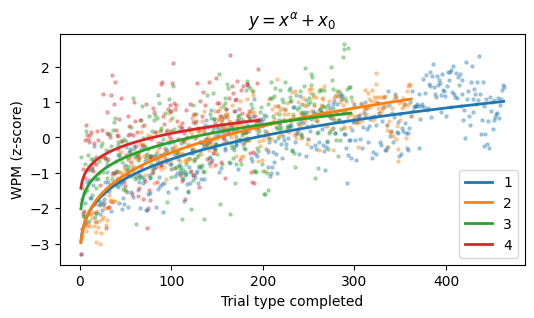

In [6]:
# Log fit for multiple trial types
fig = plt.figure(figsize=(6, 3))
ax = plot.log_fit_scatter(df, "z_wpm")
plt.show()

## Is there a better way to normalize than Z-scoring?

- Z-score based on the first n-trials
- Fractional differencing
- Log-fit normalization


### Log-fit normalization

1. fit log curve to wpm
2. z-score the variance based on the residuals from the log fit
3. shift the mean based on the y_0 from the log fit


Fit parameters: x_0=38.7109, alpha=0.5298


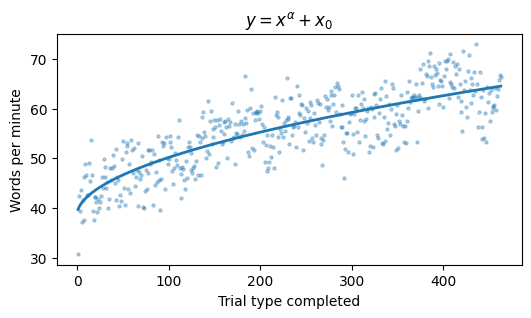

Fit parameters: x_0=38.7109, alpha=0.5298


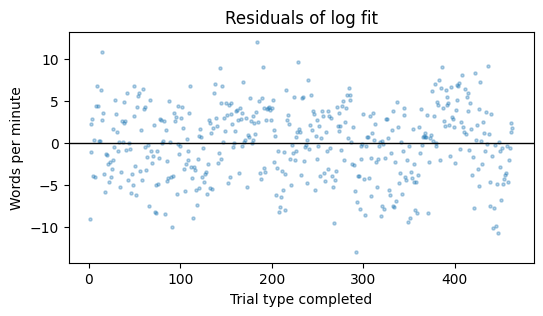

In [7]:
# Log fit for example trial type
fig = plt.figure(figsize=(6, 3))
ax = plot.log_fit_scatter(df, "wpm", n_trial_types=1)
plt.show()

# Residuals of log fit for example trial type
fig = plt.figure(figsize=(6, 3))
ax = plot.log_fit_scatter(df, "wpm", n_trial_types=1, plot_residuals=True)
plt.show()

### Plots after adding df["log_norm_wpm"]


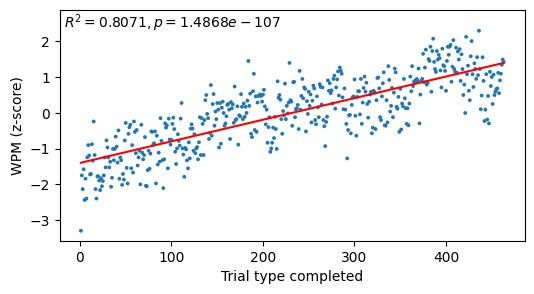

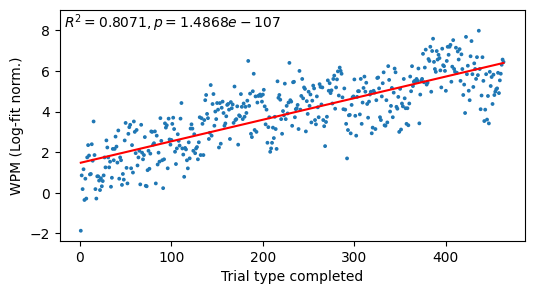

In [8]:
# Scatter of standard z-scored WPM
fig = plt.figure(figsize=(6, 3))
ax = plot.df_scatter(
    df, "trial_type_num", "z_wpm", plot_regression=True, s=3, trial_type_id=1
)
plt.show()

# Scatter of log-fit normalized WPM
fig = plt.figure(figsize=(6, 3))
ax = plot.df_scatter(
    df, "trial_type_num", "log_norm_wpm", plot_regression=True, s=3, trial_type_id=1
)
plt.show()

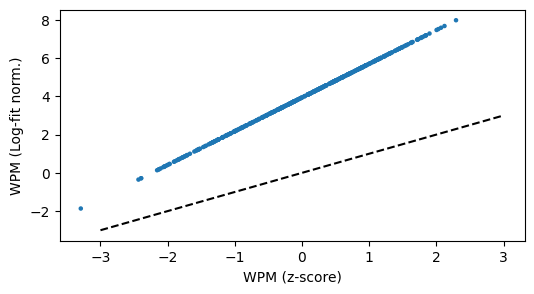

In [9]:
# Compare z-scored WPM with log-normalised WPM
fig = plt.figure(figsize=(6, 3))
ax = plot.df_scatter(
    df, "z_wpm", "log_norm_wpm", plot_regression=False, s=5, trial_type_id=1
)
x = np.linspace(-3, 3, 100)
ax.plot(x, x, "k--", label="y=x")
plt.show()

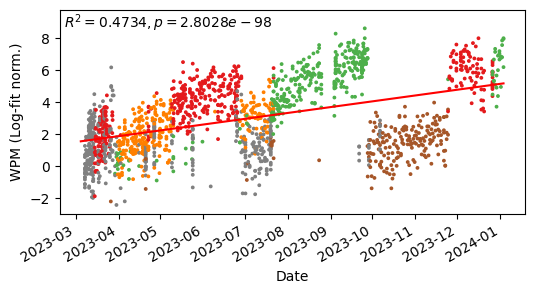

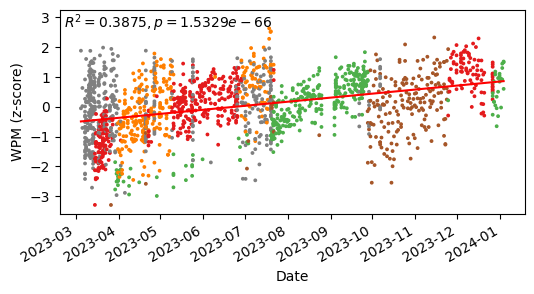

In [10]:
# Plot log_norm_wpm over datetime
fig = plt.figure(figsize=(6, 3))
ax = plot.df_scatter(
    df, "datetime", "log_norm_wpm", plot_regression=True, s=3, n_colors=5
)
plt.show()

# Plot log_norm_wpm over datetime
fig = plt.figure(figsize=(6, 3))
ax = plot.df_scatter(df, "datetime", "z_wpm", plot_regression=True, s=3, n_colors=5)
plt.show()

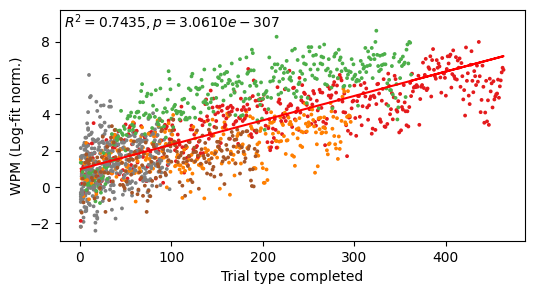

In [11]:
# Plot log_norm_wpm over trial_type_num
fig = plt.figure(figsize=(6, 3))
ax = plot.df_scatter(
    df, "trial_type_num", "log_norm_wpm", plot_regression=True, s=3, n_colors=5
)
plt.show()